# Project Problem Statement - FMST
## Problem Statement: Concrete Strength Prediction
## Objective:
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

## Resources Available: 
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

## Attribute Information:
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## Steps and Tasks:
1. Exploratory Data Quality Report Reflecting the Following:  
2. Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)
3. Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)
4. Using various plots, write the insights/observations about it. (6 Marks)
5. Bi-variate analysis between the predictor variables and also between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves and write the insights/business understanding of the same. (8 marks)
6. Feature Engineering techniques
- Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)
- Get the data model ready and do a train test split.
7. Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)
8. Creating the Model and Tuning It:
- Algorithms that you think will be suitable for this project.
- Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there and try to achieve 90% accuracy on testing set). (7 Marks)
9. Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (8 Marks)
10. Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model. (4 Marks)
11. Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation. (8 Marks)
* The marks for the score will be according to the following: testing score 90 -95 (5 marks), 85 - 90 (4 marks), 80 - 85( 3 marks), <80 (2 marks)

In [ ]:
import numpy as np
from numpy import mean
from numpy import std


import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.impute import SimpleImputer

from scipy import stats

In [110]:
df = pd.read_csv('concrete.csv')

In [111]:
df.shape

(1030, 9)

In [112]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [113]:
df.shape

(1030, 9)

In [114]:
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [115]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [9]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

Insight:

There appear to be no null values.

In [10]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [11]:
# Duplicate data
print("Number of duplicated data rows:", df.duplicated().sum())
duplicate_bool = df.duplicated()
df.loc[duplicate_bool == True]

Number of duplicated data rows: 25


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [12]:
# removing the duplicated data
df = df.drop_duplicates(keep='first')
print(df.shape)
print("Number of duplicated data rows:", df.duplicated().sum())

(1005, 9)
Number of duplicated data rows: 0


C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


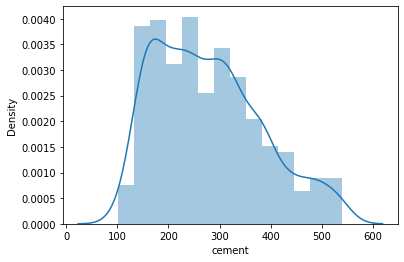

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


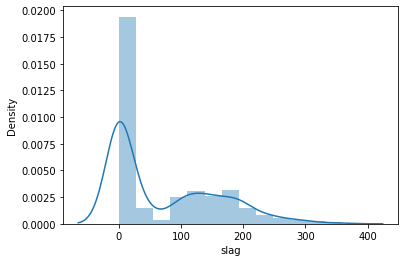

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


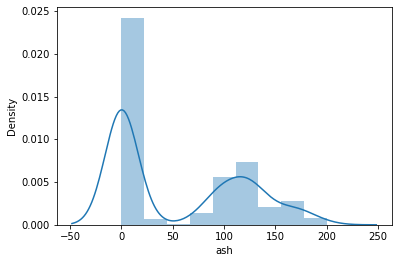

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


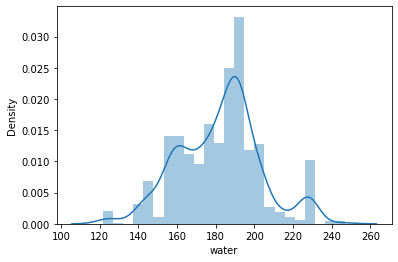

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


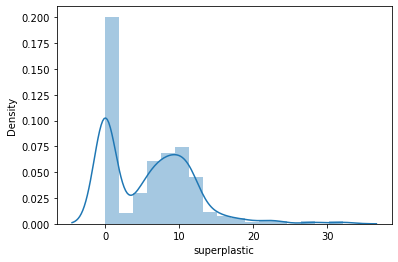

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


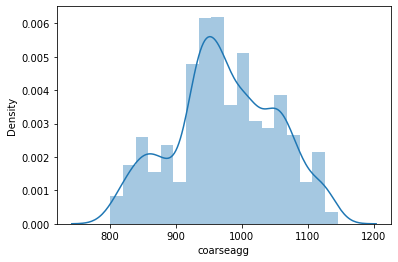

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


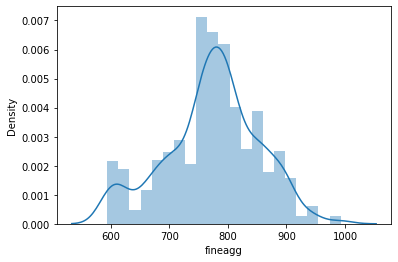

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


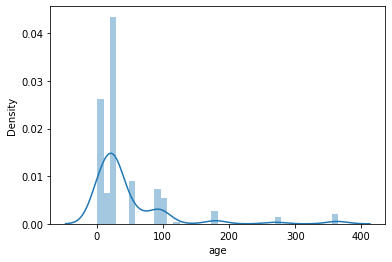

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


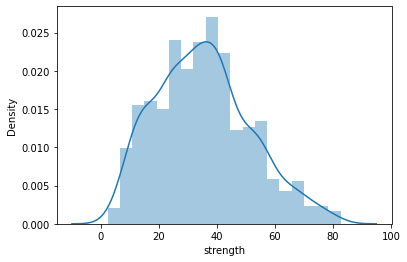

In [13]:
#Distribution plots for each variable
for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']:
    sns.distplot(df[i])
    plt.show()

Insights:

- cement has a nearly normal distribution, but does seem to have a tail on the right side.
- slag has a lot of zero values.  It would otherwise look roughly normaly, with likely a right tail.
- ash also has a lot of zero values.  It would otherwise haave a slight right tail.
- water has several peaks, and has a left tail.
- superplastic has a lot of zero values, and also appears to have a right tail.
- coarseagg looks roughly normaly, but stills has 3 noticable peaks in its distribution.
- fineagee also looks roughly normal, but has a small peak and low values, and also has a left tail.
- age has a very long right tail.  The distribution looks normal, but there does seem to be several small peaks.
- strength approaches a normal curve.

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


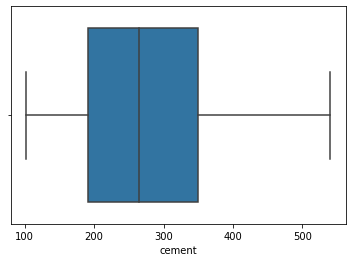

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


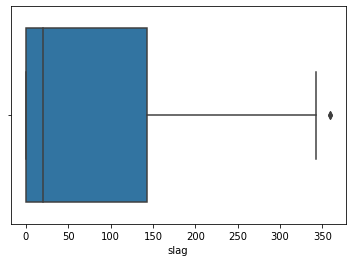

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


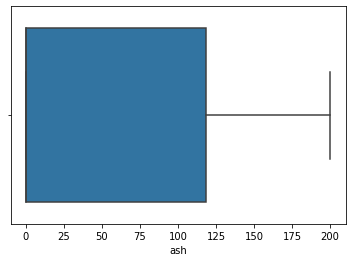

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


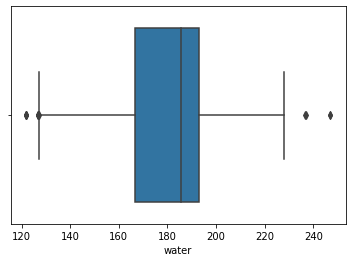

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


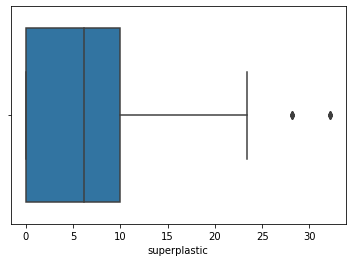

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


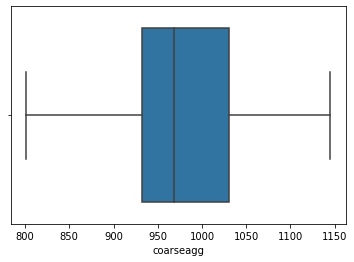

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


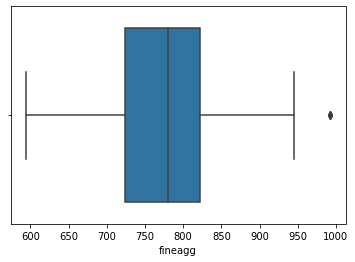

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


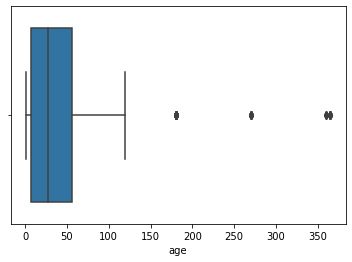

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


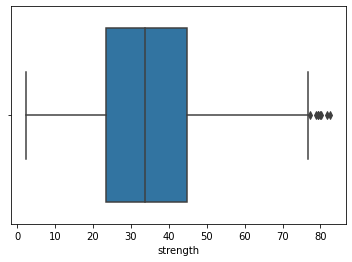

In [14]:
# Boxplots for each variable
for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']:
    sns.boxplot(df[i])
    plt.show()

Insight:

- slag, water, superplastic, fineagg, age, and strength all show the presence of outliers.  Age in particular seems to have some very distinct outliers.

- many of the charts show the aforementioned right tail (right skew).  In particular, slag, ash, superplastic, and age this is very clear.

In [15]:
# Calculation of range, central values, standard deviation, Outlier detection
for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']:
    print('--Descriptive data for', i,'--')
    print(i, 'minimum:', df[i].min())
    print(i, 'maximum:', df[i].max())
    print(i, 'range:', df[i].max() - df[i].min())
    print(i, 'mean value:', df[i].mean())
    print(i, 'median value:', df[i].median())
    print(i, 'standard deviation:', df[i].std())
    print(i, 'null values:', df[i].isnull().any())
    Q1 = df[i].quantile(q=0.25)
    Q3 = df[i].quantile(q=0.75)
    print(i, 'Quartile 1:', Q1)
    print(i, 'Quartile 3:', Q3)
    #print()
    lower_quart = Q1 - 1.5 * (Q3-Q1)
    upper_quart = Q3 + 1.5 * (Q3-Q1)
    print(i, 'Lower outlier boundary:', lower_quart)
    print(i, 'Upper outlier boundary:', upper_quart)
    upper_out = df[df[i] > upper_quart][i].count()
    lower_out = df[df[i] < lower_quart][i].count()
    print(i, 'Number of outliers (lower):', lower_out)
    print(i, 'Number of outliers (upper):', upper_out)
    print()
    print()

--Descriptive data for cement --
cement minimum: 102.0
cement maximum: 540.0
cement range: 438.0
cement mean value: 278.631343283582
cement median value: 265.0
cement standard deviation: 104.34426071285247
cement null values: False
cement Quartile 1: 190.7
cement Quartile 3: 349.0
cement Lower outlier boundary: -46.75000000000003
cement Upper outlier boundary: 586.45
cement Number of outliers (lower): 0
cement Number of outliers (upper): 0


--Descriptive data for slag --
slag minimum: 0.0
slag maximum: 359.4
slag range: 359.4
slag mean value: 72.04348258706466
slag median value: 20.0
slag standard deviation: 86.17080699343262
slag null values: False
slag Quartile 1: 0.0
slag Quartile 3: 142.5
slag Lower outlier boundary: -213.75
slag Upper outlier boundary: 356.25
slag Number of outliers (lower): 0
slag Number of outliers (upper): 2


--Descriptive data for ash --
ash minimum: 0.0
ash maximum: 200.1
ash range: 200.1
ash mean value: 55.53631840796018
ash median value: 0.0
ash standard 

In [16]:
# observing the percentage each constituent makes up of concrete on average
con = df.drop(columns=['age','strength'])
con.mean()

cement          278.631343
slag             72.043483
ash              55.536318
water           182.075323
superplastic      6.033234
coarseagg       974.376816
fineagg         772.688259
dtype: float64

In [17]:
con.mean()/(con.mean().sum()) * 100

cement          11.900280
slag             3.076960
ash              2.371943
water            7.776395
superplastic     0.257678
coarseagg       41.615408
fineagg         33.001336
dtype: float64

Insight:

- Coarseagg is the largest constituent of concrete on average, followed by fineagg and cement.

- Superplastic makes up a very small percentage of the composition of concrete



In [18]:
#data_mean, data_std = mean(df), std(df)

In [19]:
#cut_off = data_std * 3

In [ ]:
#lower, upper = data_mean - cut_off, data_mean + cut_off

In [ ]:
#df_rem = [x for x in df if x > 'lower' and x < 'upper']

In [ ]:
#z = np.abs(stats.zscore(df))

In [ ]:
#df = df[(z < 3).all(axis=1)]

In [ ]:
#df_out = df.copy()

In [ ]:
#df_noout = df_out[(np.abs(stats.zscore(df_out)) > 0).all(axis=1)]

In [ ]:
df = df_rem.copy()

In [ ]:
##replacing outliers with the median values
#for col_name in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']:
#    q1 = df_out[col_name].quantile(0.25)
#    q3 = df_out[col_name].quantile(0.75)
 #   iqr = q3 - q1
 #   low = q1 - 1.5*iqr
#    high = q3 + 1.5*iqr
#    df_out.loc[(df_out[col_name] < low) | (df_out[col_name] > high), col_name] = df_out[col_name].median()
    

In [21]:
#for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']:
 #   Q1 = df[i].quantile(q=0.25)
 #   Q3 = df[i].quantile(q=0.75)
#    lower_quart = Q1 - 1.5 * (Q3-Q1)
#    upper_quart = Q3 + 1.5 * (Q3-Q1)
#    print(i, '1st quartile:', lower_quart)
#    print(i, '3rd quartile:', upper_quart)
#    #(df_out[col_name] > high), col_name] = df_out[col_name].median()
#    upper_out = df_out[df_out[i] > upper_quart][i].count()
#    lower_out = df_out[df_out[i] < lower_quart][i].count()
#    print(i, 'Number of outliers (lower):', lower_out)
 #   print(i, 'Number of outliers (upper):', upper_out)

In [22]:
#df = df_out.copy()

Insight:

After running my algorithms, I noticed the testing accuracy actually decreased after changing the outliers.  Therefore, I decided to leave the outliers in.

In [23]:
# I originally wanted to replace the zero values with the median, which is what the code below does

In [24]:
# Counts the number of 0 values in each column.
print('number of zeros in cement:', df.cement[df.cement==0].count())
print('number of zeros in slag:', df.slag[df.slag==0].count())
print('number of zeros in ash:', df.ash[df.ash==0].count())
print('number of zeros in water:', df.water[df.water==0].count())
print('number of zeros in superplastic:', df.superplastic[df.superplastic==0].count())
print('number of zeros in coarseagg:', df.coarseagg[df.coarseagg==0].count())
print('number of zeros in fineagg:', df.fineagg[df.fineagg==0].count())

number of zeros in cement: 0
number of zeros in slag: 470
number of zeros in ash: 541
number of zeros in water: 0
number of zeros in superplastic: 378
number of zeros in coarseagg: 0
number of zeros in fineagg: 0


In [25]:
#df2 = df.copy()
#slag_med = df.slag[df.slag > 0].median()
#df2.slag.loc[df2.slag == 0] = slag_med

In [26]:
#ash_med = df.ash[df.ash > 0].median()
#df2.ash.loc[df2.ash == 0] = ash_med

In [27]:
#superplastic_med = df.superplastic[df.superplastic > 0].median()
#df2.superplastic.loc[df2.superplastic == 0] = superplastic_med

In [28]:
#print('number of zeros in slag:', df2.slag[df2.slag==0].count())
#print('number of zeros in ash:', df2.ash[df2.ash==0].count())
#print('number of zeros in superplastic:', df2.superplastic[df2.superplastic==0].count())

In [29]:
#df = df2.copy()

In [30]:
# New distribution plots for slag, ash, and superplastic:
#for i in ['slag','ash','superplastic']:
#    sns.distplot(df[i])
#    plt.show()

Insight:

At first, I removed the zero values. I then realized it is entirely possible the zero values are intended.  A zero value for any of the constituents of the concrete could reflect that none of that constituent was added to a particular concrete mix.  Since zero values were found in only 3/7 of the concrete constituents, I think it is likely these are concrete mixes with none of that constituent added to the mix.  Basically, the zeros are legitimate measurements and not missing values.

Bivariate Analyses

In [31]:
cor = df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


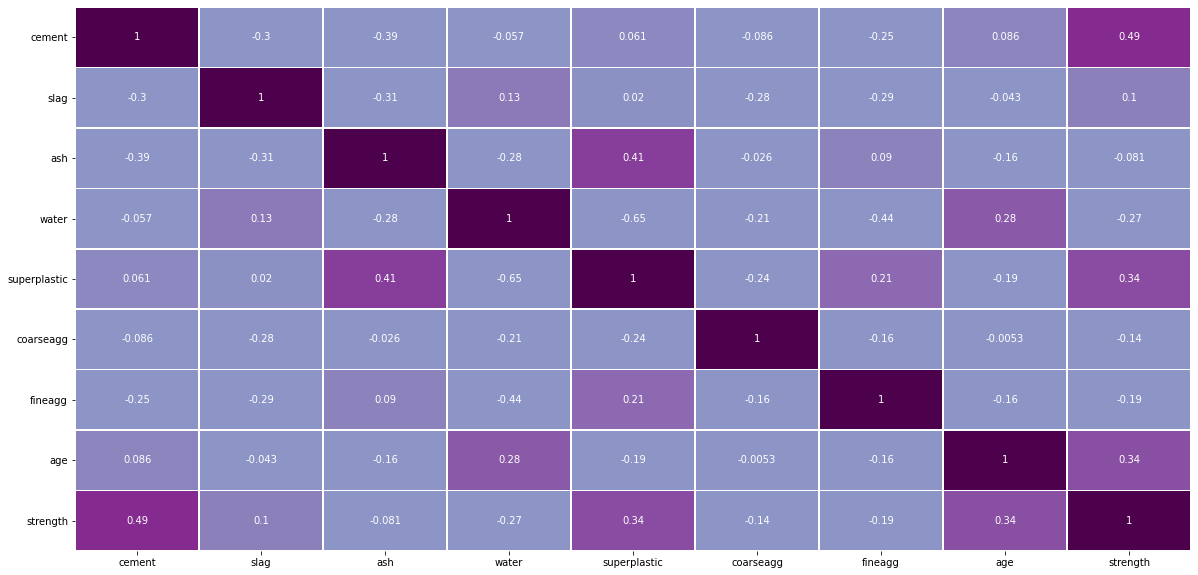

In [32]:
plt.subplots(figsize=(20,10))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="BuPu",
           vmin=0, vmax=0.8)

plt.show()

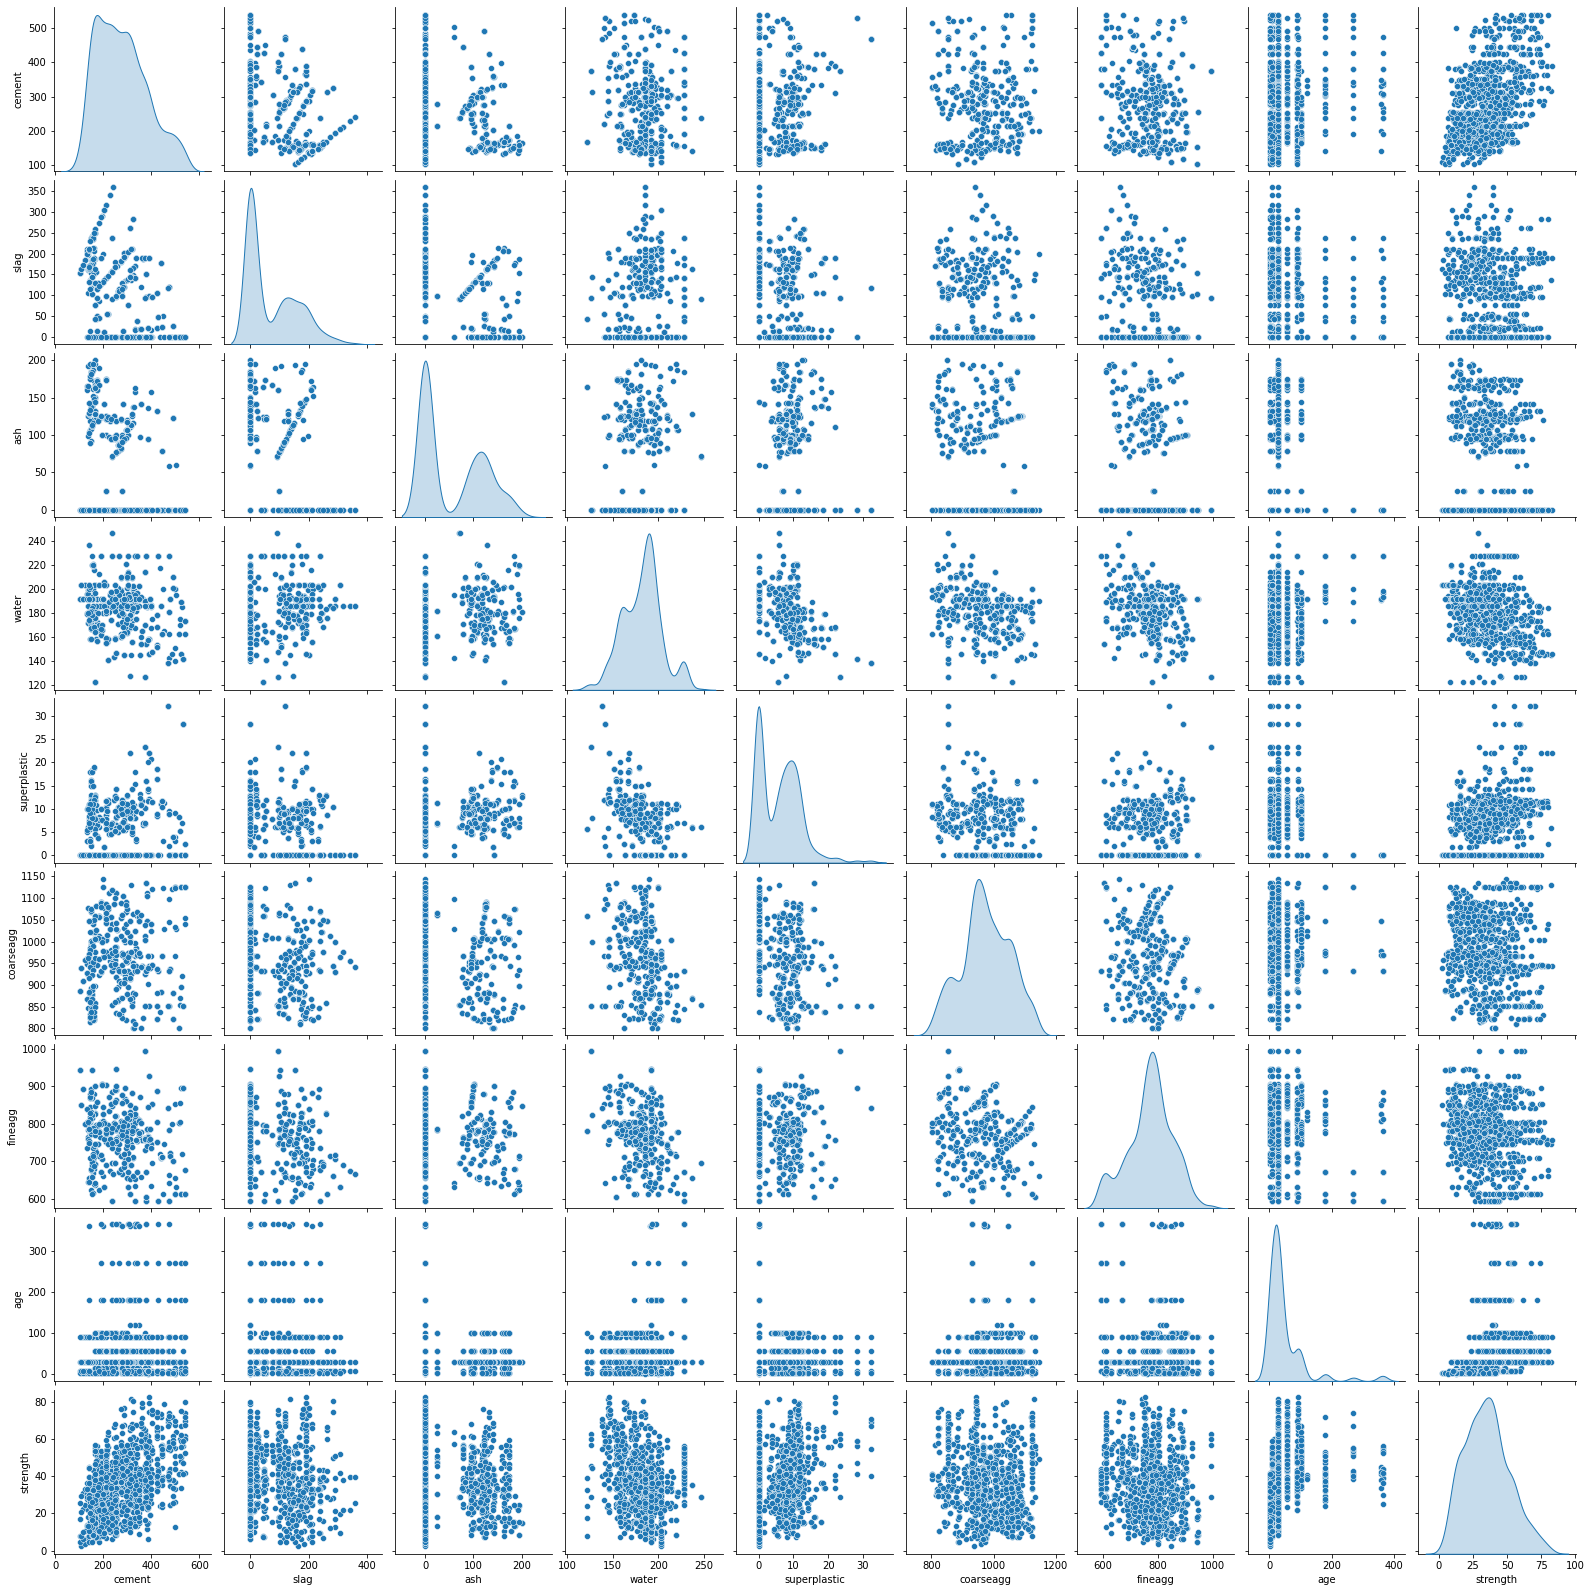

In [33]:
sns.pairplot(df, diag_kind='kde')

Insight:

The correlation heat map and the pair plots show no worrisome correlations that need to be corrected.

In [34]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


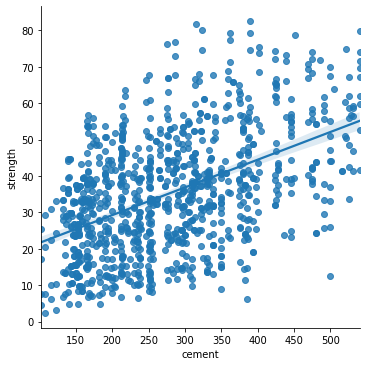

In [35]:
sns.lmplot(x = "cement", y = "strength", data = df)
plt.show()

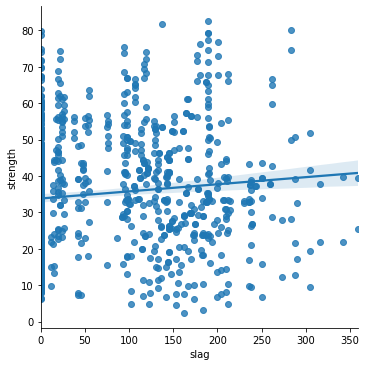

In [36]:
sns.lmplot(x = "slag", y = "strength", data = df)
plt.show()

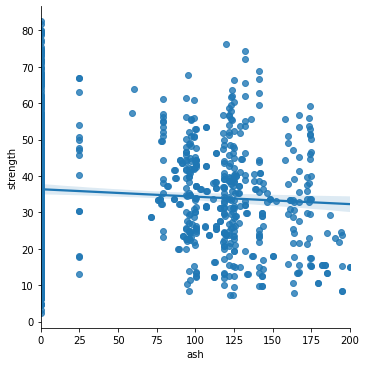

In [37]:
sns.lmplot(x = "ash", y = "strength", data = df)
plt.show()

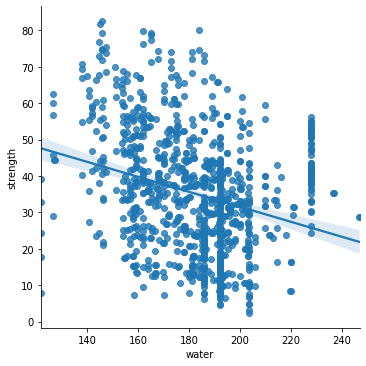

In [38]:
sns.lmplot(x = "water", y = "strength", data = df)
plt.show()

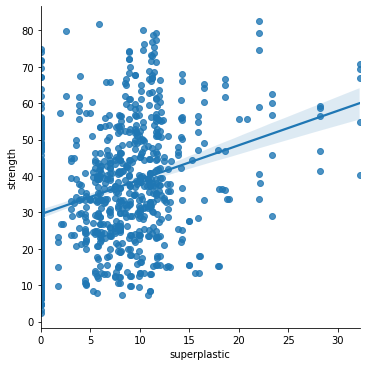

In [39]:
sns.lmplot(x = "superplastic", y = "strength", data = df)
plt.show()

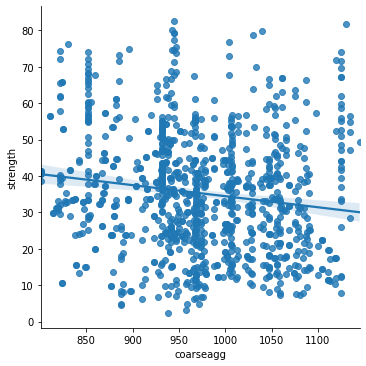

In [40]:
sns.lmplot(x = "coarseagg", y = "strength", data = df)
plt.show()

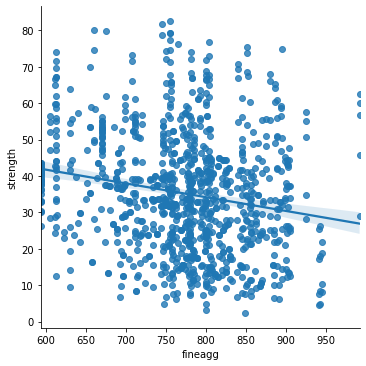

In [41]:
sns.lmplot(x = "fineagg", y = "strength", data = df)
plt.show()

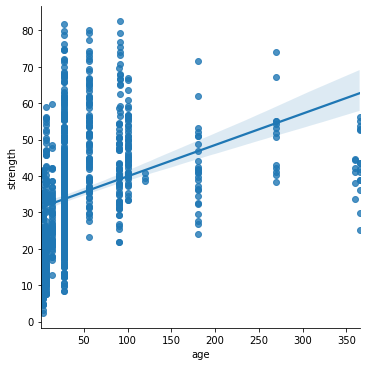

In [42]:
sns.lmplot(x = "age", y = "strength", data = df)
plt.show()

Insights:

- an increase in cement amount seems to lead to an increase in concrete stength
- an increase in slag amount causes a slight increase in concrete strength
- an increase in ash causes a very slight decrease in concrete strength
- an increase in water cause a decrease in concrete strength
- an increase in superplastic increases concrete strength
- an increase in coarseagg cause a decrease in concrete strength
- an increase in fineagg causes a decrease in concrete strength
- the older a concrete mix is, the stronger it is.

Simple Linear Regression

In [116]:
lr_model = LinearRegression()  

In [117]:
X = df.drop(columns=['strength'])
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
#X_scaled.head()

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 1)

In [119]:
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
# simple linear regression
reg_lin_reg = lr_model.fit(X_train, y_train) 

In [121]:
reg_lr_train = reg_lin_reg.score(X_train, y_train)
reg_lr_test = reg_lin_reg.score(X_test, y_test)
pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(pred_lr, y_test)
print('Linear regression | train | accuracy:',reg_lr_train)
print('Linear regression | test | accuracy:',reg_lr_test)
print('Linear regression | mean squared error:', mse_lr)

Linear regression | train | accuracy: 0.6081240738631453
Linear regression | test | accuracy: 0.6271242456735368
Linear regression | mean squared error: 113.28592479864177


Simple Linear Model and KFold Cross Validation

In [200]:
# KFold cross validation parameters
folds = 10
seed = 7
kfold = KFold(n_splits = folds, shuffle = True, random_state = seed)

In [162]:
X = df.drop(columns=['strength'])
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [163]:
# Simple linear regression with KFold cross validation
lr_results = cross_val_score(lr_model, X_scaled, y, cv = kfold)
lr_kfold = lr_results.mean()
lr_kfold_std = lr_results.std()
pred_lr_kfold = lr_model.predict(X_test)
mse_lr_kfold = mean_squared_error(pred_lr_kfold, y_test)
print('Linear regression | KFold | accuracy:', lr_kfold)
print('Linear regression | KFold | standard deviation:', lr_kfold_std)
print('Linear regression | KFold | mean squared error:', mse_lr_kfold)

Linear regression | KFold | accuracy: 0.5617124694195145
Linear regression | KFold | standard deviation: 0.18410362319061796
Linear regression | KFold | mean squared error: 79.52433447942926


Polynomial Regression with/without KFold

degree=2

In [164]:
X = df.drop(columns=['strength'])
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
poly = PolynomialFeatures(degree = 2, interaction_only = True)
X_poly = poly.fit_transform(X_scaled)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=0)

In [166]:
#Polynomial regression
deg_2 = lr_model.fit(X_train, y_train)  

In [167]:
deg_2_train = deg_2.score(X_train, y_train)
deg_2_test = deg_2.score(X_test, y_test)
pred_lr2_kfold = lr_model.predict(X_test)
mse_lr2_kfold = mean_squared_error(pred_lr2_kfold, y_test)
print('Polynomial regression - degree 2 | train | accuracy:', deg_2_train)
print('Polynomial regression - degree 2 | test | accuracy:', deg_2_test)
print('Polynomial regression - degree 2 | mean squared error:', mse_lr2_kfold)

Polynomial regression - degree 2 | train | accuracy: 0.7686136161512147
Polynomial regression - degree 2 | test | accuracy: 0.705533393033653
Polynomial regression - degree 2 | mean squared error: 79.52433447942926


In [168]:
#Polynomial regression with KFold cross validation
lr_2_kfold = cross_val_score(lr_model, X_poly, y, cv = kfold)
lr_poly_kfold = lr_2_kfold.mean()
lr2_kfold_std = lr_2_kfold.std()
pred_lr2_kfold_mse = lr_model.predict(X_test)
mse_lr2_kfold_mse = mean_squared_error(pred_lr2_kfold_mse, y_test)
print('Polynomial regression - degree 2 | KFold | accuracy:', lr_poly_kfold)
print('Polynomial regression - degree 2 | KFold | standard deviation:', lr2_kfold_std)
print('Polynomial regression - degree 2 | KFold | mean squared error:', mse_lr2_kfold_mse)

Polynomial regression - degree 2 | KFold | accuracy: 0.6977214893926018
Polynomial regression - degree 2 | KFold | standard deviation: 0.11885249798789328
Polynomial regression - degree 2 | KFold | mean squared error: 79.52433447942926


Insight:

- Going from a simple linear model to a polynomial model of degree 2 provides a slightly better R^2.

--> Bagging Regressor with/without KFold

In [169]:
X = df.drop(columns = ['strength'])
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=0)

In [170]:
# bagging regressor
bag_model = BaggingRegressor()
bag_norm = bag_model.fit(X_train, y_train)
bag_norm_train = bag_model.score(X_train, y_train)
bag_norm_test = bag_model.score(X_test, y_test)
bag_pred_mse = bag_model.predict(X_test)
bag_mse = mean_squared_error(bag_pred_mse, y_test)
print('Bagging regressor | train | accuracy:', bag_norm_train)
print('Bagging regressor | test | accuracy:', bag_norm_test)
print('Bagging regressor | mean squared error:', bag_mse)

Bagging regressor | train | accuracy: 0.9750806050107494
Bagging regressor | test | accuracy: 0.88494160839231
Bagging regressor | mean squared error: 31.0729359540615


In [171]:
# bagging regressor with kfold cross validation
bag_model = BaggingRegressor()
bag_norm = bag_model.fit(X_train, y_train)
results = cross_val_score(bag_model, X_scaled, y, cv = kfold)
bag_kfold = results.mean()
bag_kfold_std = results.std()
bag_kfold_pred_mse = bag_model.predict(X_test)
bag_kfold_mse = mean_squared_error(bag_kfold_pred_mse, y_test)
print('Bagging regressor | KFold | accuracy:', bag_kfold)
print('Bagging regressor | KFold | standard deviation:', bag_kfold_std)
print('Bagging regressor | KFold | mean standard error:', bag_kfold_mse)

Bagging regressor | KFold | accuracy: 0.9039487267212527
Bagging regressor | KFold | standard deviation: 0.06840782615100528
Bagging regressor | KFold | mean standard error: 28.451836143964076


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=0)

In [173]:
# Bagging regressor with degree 2 polynomial
bag_2poly = bag_model.fit(X_train, y_train)
bag_2poly_train = bag_model.score(X_train, y_train)
bag_2poly_test = bag_model.score(X_test, y_test)
bag2_pred_mse = bag_model.predict(X_test)
bag2_mse = mean_squared_error(bag2_pred_mse, y_test)
print('Bagging regressor - 2nd degree polynomial | train | accuracy:', bag_2poly_train)
print('Bagging regressor - 2nd degree polynomial | test | accuracy:', bag_2poly_test)
print('Bagging regressor - 2nd degree polynomial | mean squared error:', bag2_mse)

Bagging regressor - 2nd degree polynomial | train | accuracy: 0.9738214077599245
Bagging regressor - 2nd degree polynomial | test | accuracy: 0.8760663622295455
Bagging regressor - 2nd degree polynomial | mean squared error: 33.469805506457355


In [174]:
# bagging regressor with degree 2 polynomial and kfold cross validation
results2 = cross_val_score(bag_model, X_poly, y, cv = kfold)
bag_kfold_2 = results2.mean()
bag_kfold2_std = results2.std()
bag2_kfold_pred_mse = bag_model.predict(X_test)
bag2_kfold_mse = mean_squared_error(bag2_kfold_pred_mse, y_test)
print('Bagging regressor - 2nd degree polynomial | KFold | accuracy:', bag_kfold_2)
print('Bagging regressor - 2nd degree polynomial | KFold | standard deviation:', bag_kfold2_std)
print('Bagging regressor - 2nd degree polynomial | KFold | mean squared error:', bag2_kfold_mse)

Bagging regressor - 2nd degree polynomial | KFold | accuracy: 0.8943582196713229
Bagging regressor - 2nd degree polynomial | KFold | standard deviation: 0.059857292502876
Bagging regressor - 2nd degree polynomial | KFold | mean squared error: 33.469805506457355


Insight:

- Using the bagging regressor with the degree 2 polynomial as a fit produced slightly less accurate results.

--> Gradient Boosting with/without KFold

In [175]:
X = df.drop(columns = ['strength'])
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)

In [176]:
# Gradient Boosting regressor
gb_model = GradientBoostingRegressor()
gb_norm = gb_model.fit(X_train, y_train)
gb_norm_pred = gb_model.predict(X_test)
gb_norm_score_test = gb_model.score(X_test, y_test)
gb_norm_score_train = gb_model.score(X_train, y_train)
gb_pred_mse = gb_model.predict(X_test)
gb_mse = mean_squared_error(gb_pred_mse, y_test)
print('Gradient boosting regressor | train | accuracy:', gb_norm_score_train)
print('Gradient boosting regressor | test | accuracy:', gb_norm_score_test)
print('Gradient boosting regressor | mean squared error:', gb_mse)
print('Feature importances: \n', pd.DataFrame(gb_model.feature_importances_,columns=['Imp'], index=X_train.columns))

Gradient boosting regressor | train | accuracy: 0.9470168855516335
Gradient boosting regressor | test | accuracy: 0.9159614703466474
Gradient boosting regressor | mean squared error: 22.938186680470864
Feature importances: 
                    Imp
cement        0.310091
slag          0.076343
ash           0.008096
water         0.108695
superplastic  0.079362
coarseagg     0.011117
fineagg       0.037235
age           0.369061


In [177]:
# Gradient Boost - KFold Validation
results = cross_val_score(gb_model, X_scaled, y, cv = kfold)
gb_kfold_mean = results.mean()
gb_kfold_sd = results.std()
gb_kfold_pred = gb_model.predict(X_test)
gb_kfold_mse = mean_squared_error(gb_kfold_pred, y_test)
print('Gradient boosting regressor | KFold | accuracy:', gb_kfold_mean)
print('Gradient boosting regressor | KFold | standard deviation:', gb_kfold_sd)
print('Gradient boosting regressor | KFold | mean squared error:', gb_kfold_mse)

Gradient boosting regressor | KFold | accuracy: 0.8980408921054535
Gradient boosting regressor | KFold | standard deviation: 0.05543923401053099
Gradient boosting regressor | KFold | mean squared error: 22.938186680470864


In [178]:
# Gradient boosting with 2nd degree polynomial
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state=0)

In [179]:
gb_poly = gb_model.fit(X_train, y_train)
gb_poly_train = gb_model.score(X_train, y_train)
gb_poly_test = gb_model.score(X_test, y_test)
gb2_pred_mse = gb_model.predict(X_test)
gb2_mse = mean_squared_error(gb2_pred_mse, y_test)
print('Gradient boosting regressor - 2nd degree polynomial | train | accuracy:', gb_poly_train)
print('Gradient boosting regressor - 2nd degree polynomial | test | accuracy:', gb_poly_test)
print('Gradient boosting regressor - 2nd degree polynomial | mean squared error:', gb2_mse)

Gradient boosting regressor - 2nd degree polynomial | train | accuracy: 0.9603259408218624
Gradient boosting regressor - 2nd degree polynomial | test | accuracy: 0.914505539462369
Gradient boosting regressor - 2nd degree polynomial | mean squared error: 23.335580763342097


In [180]:
#Gradient Boost with 2nd degree polynomial - KFold Validation
results2 = cross_val_score(gb_model, X_poly, y, cv = kfold)
gb_kfold_2mean = results2.mean()
gb_kfold_2sd = results2.std()
gb2_kfold_pred = gb_model.predict(X_test)
gb2_kfold_mse = mean_squared_error(gb2_kfold_pred, y_test)
print('Gradient boosting - 2nd degree polynomial | KFold | accuracy:', gb_kfold_2mean)
print('Gradient boosting - 2nd degree polynomial | KFold | standard deviation:', gb_kfold_2sd)
print('Gradient boosting - 2nd degree polynomial | KFold | mean squared error:', gb2_kfold_mse)

Gradient boosting - 2nd degree polynomial | KFold | accuracy: 0.9055068521418113
Gradient boosting - 2nd degree polynomial | KFold | standard deviation: 0.0499953381968431
Gradient boosting - 2nd degree polynomial | KFold | mean squared error: 23.335580763342097


In [201]:
# Removing less important features to attempt to improve performance - will remove ash, coarseagg, and fineagg

In [182]:
df2 = df.copy()

In [183]:
X = df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df2['strength']
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

In [184]:
# running gradient boost regressor without ash, coarseagg, and fineagg
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_remove_train = gb_model.score(X_train, y_train)
gb_remove_test = gb_model.score(X_test, y_test)
gb_pred_mse_rem = gb_model.predict(X_test)
gb_mse_rem = mean_squared_error(gb_pred_mse_rem, y_test)
print('Gradient boosting regressor | feature removal | train | accuracy:', gb_remove_train)
print('Gradient boosting regressor | feature removal | test | accuracy:', gb_remove_test)
print('Gradient boosting regressor | feature removal | mean squared error:', gb_mse_rem)
print()
print('Feature importances: \n', pd.DataFrame(gb_model.feature_importances_,columns=['Imp'], index=X_train.columns))

Gradient boosting regressor | feature removal | train | accuracy: 0.9424678363166648
Gradient boosting regressor | feature removal | test | accuracy: 0.88968041184635
Gradient boosting regressor | feature removal | mean squared error: 32.107364285901866

Feature importances: 
                    Imp
cement        0.343482
slag          0.096759
water         0.113937
superplastic  0.070540
age           0.375282


Insights:

- The second degree polynomial fit was a slight accuracy improvement for the gradient boost model.
- Removing less important features (strength, ash, coarseagg, fineagg) did not improve model performace.

--> Random Forest with/without KFold

In [185]:
# Random Forest
X = df.drop(columns = ['strength'])
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=0)

In [186]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_train = rf_model.score(X_train, y_train)
rf_test = rf_model.score(X_test, y_test)
rf_pred_mse = rf_model.predict(X_test)
rf_mse = mean_squared_error(rf_pred_mse, y_test)
print('Random forest regressor | train | acurracy:', rf_train)
print('Random forest regressor | test | acurracy:', rf_test)
print('Random forest regressor | mean squared error:', rf_mse)
print()
print('Feature importances: \n', pd.DataFrame(rf_model.feature_importances_,columns=['Imp'], index=X_train.columns))


Random forest regressor | train | acurracy: 0.9830430241236023
Random forest regressor | test | acurracy: 0.8950961842162873
Random forest regressor | mean squared error: 28.33056766774855

Feature importances: 
                    Imp
cement        0.293164
slag          0.069200
ash           0.023180
water         0.113515
superplastic  0.083755
coarseagg     0.028038
fineagg       0.036830
age           0.352317


In [187]:
# Random forest kfold validation
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
scores3 = cross_val_score(rf_model, X_scaled, y, cv = kfold)
rf_kfold_mean = scores3.mean()
rf_kfold_std = scores3.std()
rf_pred_mse_kfold = rf_model.predict(X_test)
rf_mse_kfold = mean_squared_error(rf_pred_mse_kfold, y_test)
print('Random forest regressor - 2nd degree polynomial | KFold | acurracy:', rf_kfold_mean)
print('Random forest regressor - 2nd degree polynomial | KFold | standard deviation:', rf_kfold_std)
print('Random forest regressor - 2nd degree polynomial | KFold | mean squared error:', rf_mse_kfold)

Random forest regressor - 2nd degree polynomial | KFold | acurracy: 0.9102223067224909
Random forest regressor - 2nd degree polynomial | KFold | standard deviation: 0.06659515685668498
Random forest regressor - 2nd degree polynomial | KFold | mean squared error: 27.566237661695787


In [188]:
# Removing less important features to attempt to improve performce - will remove ash, coarseagg, and fineagg

In [189]:
df3 = df.copy()

In [190]:
X = df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df3['strength']
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

In [191]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_rem_train = rf_model.score(X_train, y_train)
rf_rem_test = rf_model.score(X_test, y_test)
rf_pred_mse_rem = rf_model.predict(X_test)
rf_mse_rem = mean_squared_error(rf_pred_mse_rem, y_test)
print('Random forest regressor | feature removal | train | acurracy:', rf_rem_train)
print('Random forest regressor | feature removal | test | acurracy:', rf_rem_test)
print('Random forest regressor | feature removal | mean squared error:', rf_mse_rem)
print()
print('Feature importances: \n', pd.DataFrame(rf_model.feature_importances_,columns=['Imp'], index=X_train.columns))

Random forest regressor | feature removal | train | acurracy: 0.9817557328823288
Random forest regressor | feature removal | test | acurracy: 0.9092279260295325
Random forest regressor | feature removal | mean squared error: 26.418264378375554

Feature importances: 
                    Imp
cement        0.352513
slag          0.094244
water         0.134435
superplastic  0.064457
age           0.354351


In [192]:
# Random forest kfold validation with feature removal


In [193]:
X = df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df3['strength']
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

In [194]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_feat_rem = cross_val_score(rf_model, X_scaled, y, cv = kfold)
rf_kfold_mean_rem = rf_feat_rem.mean()
rf_kfold_std_rem = rf_feat_rem.std()
rf_pred_mse_kfold_rem = rf_model.predict(X_test)
rf_mse_kfold_rem = mean_squared_error(rf_pred_mse_kfold_rem, y_test)
print('Random forest regressor - 2nd degree polynomial | KFold | acurracy:', rf_kfold_mean_rem)
print('Random forest regressor - 2nd degree polynomial | KFold | standard deviation:', rf_kfold_std_rem)
print('Random forest regressor - 2nd degree polynomial | KFold | mean squared error:', rf_mse_kfold_rem)

Random forest regressor - 2nd degree polynomial | KFold | acurracy: 0.9086110514153369
Random forest regressor - 2nd degree polynomial | KFold | standard deviation: 0.05073180061529723
Random forest regressor - 2nd degree polynomial | KFold | mean squared error: 27.361872978349673


In [195]:
# Random forest with polynomial fit
X = df.drop(columns = ['strength'])
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=0)

In [196]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_poly_train = rf_model.score(X_train, y_train)
rf_poly_test = rf_model.score(X_test, y_test)
rf2_pred_mse = rf_model.predict(X_test)
rf2_mse = mean_squared_error(rf2_pred_mse, y_test)
print('Random forest regressor - 2nd degree polynomial | train | acurracy:', rf_poly_train)
print('Random forest regressor - 2nd degree polynomial | test | acurracy:', rf_poly_test)
print('Random forest regressor - 2nd degree polynomial | mean squared error:', rf2_mse)

Random forest regressor - 2nd degree polynomial | train | acurracy: 0.9811855398711617
Random forest regressor - 2nd degree polynomial | test | acurracy: 0.8836804742460161
Random forest regressor - 2nd degree polynomial | mean squared error: 31.41352076504061


In [197]:
# Random Forest - KFold validation polynomial fit
scores = cross_val_score(rf_model, X_poly, y, cv = kfold)
rf2_kfold_mean = scores.mean()
rf2_kfold_std = scores.std()
rf2_pred_mse_kfold = rf_model.predict(X_test)
rf2_mse_kfold = mean_squared_error(rf2_pred_mse_kfold, y_test)
print('Random forest regressor - 2nd degree polynomial | KFold | acurracy:', rf2_kfold_mean)
print('Random forest regressor - 2nd degree polynomial | KFold | standard deviation:', rf2_kfold_std)
print('Random forest regressor - 2nd degree polynomial | KFold | mean squared error:', rf2_mse_kfold)

Random forest regressor - 2nd degree polynomial | KFold | acurracy: 0.9016510602161238
Random forest regressor - 2nd degree polynomial | KFold | standard deviation: 0.06189829266305977
Random forest regressor - 2nd degree polynomial | KFold | mean squared error: 31.41352076504061


Insights:

- Using a degree 2 polynomial fit did not improve model performance.
- Removing less important features (strength, ash, coarseagg, fineagg) did not increase model performance.

--> SUMMARY <--

In [198]:
summary_kfold = pd.DataFrame({'Method with KFold':['Linear Regression','Bagging','Gradient Boosting','Random Forest'], 
                              'Accuracy Score': [lr_kfold, bag_kfold, gb_kfold_mean, rf_kfold_mean],
                              'Standard Deviation':  [lr_kfold_std, bag_kfold_std , gb_kfold_sd, rf_kfold_std],
                              'MSE': [mse_lr_kfold,bag_kfold_mse , gb_kfold_mse, rf_mse_kfold],
                              'Accuracy - Poly': [lr_poly_kfold, bag_kfold_2, gb_kfold_2mean, rf2_kfold_mean],
                              'Std Dev - Poly': [lr2_kfold_std, bag_kfold2_std, gb_kfold_2sd, rf2_kfold_std],
                              'MSE - Poly':  [mse_lr2_kfold_mse, bag2_kfold_mse, gb2_kfold_mse, rf2_mse_kfold]})
summary_kfold

,Method with KFold,Accuracy Score,Standard Deviation,MSE,Accuracy - Poly,Std Dev - Poly,MSE - Poly
0,Linear Regression,0.561712,0.184104,79.524334,0.697721,0.118852,79.524334
1,Bagging,0.903949,0.068408,28.451836,0.894358,0.059857,33.469806
2,Gradient Boosting,0.898041,0.055439,22.938187,0.905507,0.049995,23.335581
3,Random Forest,0.910222,0.066595,27.566238,0.901651,0.061898,31.413521


In [199]:
summary = pd.DataFrame({'Method':['Linear Regression','Bagging','Gradient Boosting','Random Forest','RF-Feature Removal','GB-Feature Removal'], 
                        'Train Score': [reg_lr_train, bag_norm_train, gb_norm_score_train, rf_train, gb_remove_train, rf_rem_train],
                        'Test Score':  [reg_lr_test,  bag_norm_test, gb_norm_score_test, rf_test, gb_remove_test, rf_rem_test],
                        'MSE': [mse_lr,  bag_mse, gb_mse, rf_mse, gb_mse_rem, rf_mse_rem],
                        'Train Score - Poly': [deg_2_train, bag_2poly_train, gb_poly_train, rf_poly_train,'',''],
                        'Test_Score - Poly':  [deg_2_test, bag_2poly_test, gb_poly_test, rf_poly_test,'',''],
                        'MSE - Poly': [mse_lr2_kfold,  bag2_mse, gb2_mse, rf2_mse,'','']})
summary

,Method,Train Score,Test Score,MSE,Train Score - Poly,Test_Score - Poly,MSE - Poly
0,Linear Regression,0.608124,0.627124,113.285925,0.768614,0.705533,79.5243
1,Bagging,0.975081,0.884942,31.072936,0.973821,0.876066,33.4698
2,Gradient Boosting,0.947017,0.915961,22.938187,0.960326,0.914506,23.3356
3,Random Forest,0.983043,0.895096,28.330568,0.981186,0.88368,31.4135
4,RF-Feature Removal,0.942468,0.889680,32.107364,,,
5,GB-Feature Removal,0.981756,0.909228,26.418264,,,


Insights:

- Feature removal did not appear to improve the performance of the model (it resulted in a decrease in the R^2 value for both the Random Forest and Gradient Boost models).
- Using a polynomial of degree 2 fit did not improve the performance of the model versus using a simple linear model.
- Gradient boosting performed well overall with the KFold cross validation with a slightly lower R^2 than the simple train/test split.  Bagging and random forest performed very similarly, with R^2 values nearly 0.90.

--> Grid Search and Randomized Search <--

Gradient Boost - Grid Search

In [88]:
X = df.drop(columns=['strength'])  
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [89]:
gbr = GradientBoostingRegressor()

param_grid_gb={
    'loss' :['ls','lad', 'huber','quantile'],
    'n_estimators' :[10, 50, 100, 200, 500],
    'learning_rate'  :[0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth'  :[1, 2, 3],
    'min_samples_split':[2, 3, 4, 5],
    'min_samples_leaf' :[1, 2, 3, 5, 7, 10],
}

gbr_grid = GridSearchCV(gbr, param_grid = param_grid_gb, n_jobs=-1, cv=seed, verbose=3);

In [90]:
#Grid Search - Gradient Boost
#WARNING!!: this takes a while to run (~30 mins)
gbr_grid.fit(X_train, y_train);
gbr_grid.best_params_

Fitting 7 folds for each of 7200 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1168 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 3936 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 4352 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 4832 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 5376 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 5984 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6656 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7392 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 8640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 10064 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 13424 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 14704 tasks 

{'learning_rate': 0.15,
 'loss': 'huber',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [94]:
gbr_grid_train = gbr_grid.score(X_train, y_train)
gbr_grid_val = gbr_grid.score(X_val, y_val)
gbr_grid_test = gbr_grid.score(X_test, y_test)
print('GradientBoostingRegressor - Train score :', gbr_grid_train)
print('GradientBoostingRegressor - Validate score :', gbr_grid_val)
print('GradientBoostingRegressor - Test score :', gbr_grid_test)

GradientBoostingRegressor - Train score : 0.9884555804231799
GradientBoostingRegressor - Validate score : 0.922122840302207
GradientBoostingRegressor - Test score : 0.921358053740004


Gradient Boost - Random Search 

In [95]:
X = df.drop(columns=['strength'])  
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [96]:
rs = RandomizedSearchCV(gbr, param_distributions = param_grid_gb, n_iter = 10, n_jobs = -1, cv = seed, verbose = 3);

In [97]:
# Random Search - Gradient Boost
rs.fit(X_train, y_train);
rs.best_params_

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.0s finished


{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 3,
 'loss': 'lad',
 'learning_rate': 0.2}

In [98]:
grb_rs_train = rs.score(X_train, y_train)
grb_rs_val = rs.score(X_val, y_val)
grb_rs_test = rs.score(X_test, y_test)
print('GradientBoostingRegressor - Train score :', grb_rs_train)
print('GradientBoostingRegressor - Validate score :', grb_rs_val)
print('GradientBoostingRegressor - Test score :', grb_rs_test)

GradientBoostingRegressor - Train score : 0.9321990082158776
GradientBoostingRegressor - Validate score : 0.894845155695175
GradientBoostingRegressor - Test score : 0.9038755745368923


Random Forest - Grid Search

In [99]:
X = df.drop(columns=['strength'])  
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [100]:
model = RandomForestRegressor()
params = {
    'bootstrap': [True, False],
    'max_depth': [4, 5, 3],
    'max_features': ['sqrt','log2', 0.5],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 3],
    'n_estimators': [25, 50, 100]
}    

grid = GridSearchCV(estimator = model, param_grid = params, cv = kfold)

In [102]:
#Grid Search - Random Forest
grid.fit(X_train, y_train)
grid.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 0.5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [103]:
rf_grid_train = grid.score(X_train, y_train)
rf_grid_val = grid.score(X_val, y_val)
rf_grid_test = grid.score(X_test, y_test)
print('RandomForestRegressor - Train score :', rf_grid_train)
print('RandomForestRegressor - Validate score :', rf_grid_val)
print('RandomForestRegressor - Test score :', rf_grid_test)

RandomForestRegressor - Train score : 0.8661582227677622
RandomForestRegressor - Validate score : 0.8244662503523381
RandomForestRegressor - Test score : 0.8072574224251087


Random Forest - Random Search

In [104]:
X = df.drop(columns=['strength'])  
y = df.strength
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [105]:
rs_rf = RandomizedSearchCV(model, param_distributions = params, n_iter = 10, n_jobs = -1, cv = seed, verbose = 3);

In [106]:
# Random Search - Random Forest
rs_rf.fit(X_train, y_train);
rs_rf.best_params_

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished


{'n_estimators': 25,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': 5,
 'bootstrap': False}

In [107]:
rf_rs_train = rs_rf.score(X_train, y_train)
rf_rs_val = rs_rf.score(X_val, y_val)
rf_rs_test = rs_rf.score(X_test, y_test)
print('RandomForestRegressor - Train score :', rf_rs_train)
print('RandomForestRegressor - Validate score :', rf_rs_val)
print('RandomForestRegressor - Test score :', rf_rs_test)

RandomForestRegressor - Train score : 0.8615715074124898
RandomForestRegressor - Validate score : 0.8316712474151524
RandomForestRegressor - Test score : 0.7864258264535358


In [108]:
summary2 = pd.DataFrame({'Method':['Gradient Boost - Grid Search','Gradient Boost - Random Search',
                                   'Random Forest - Grid Search','Random Forest - Random Search'], 
                         'Train Score': [gbr_grid_train, grb_rs_train, rf_grid_train, rf_rs_train],
                         'Validation Score': [gbr_grid_val, grb_rs_val, rf_grid_val, rf_rs_val],
                         'Test Score':  [gbr_grid_test,  grb_rs_test, rf_grid_test, rf_rs_test]
                
                        })
summary2

,Method,Train Score,Validation Score,Test Score
0,Gradient Boost - Grid Search,0.988456,0.922123,0.921358
1,Gradient Boost - Random Search,0.932199,0.894845,0.903876
2,Random Forest - Grid Search,0.866158,0.824466,0.807257
3,Random Forest - Random Search,0.861572,0.831671,0.786426


Insights:

- Grid search produced a slightly more accurate model, however, it took MUCH longer to run.
- In a fast-paced business environment, I would assume a random search would be more practical to use, as it results in a small loss of accuracy and gains a great amount of computational time and resources.

**Conclusion**

- Gradient boosting seemed to produce the more accurate of all the models.  The only snag is the KFold cross validation shows a reduced accuracy compared to all other measures used to approximate model accuracy.  It is possible there is an error in the code, or possibly that the gradient boost train/test split is not achieving an adequatly randomized set of train and test groups.
- Grid search is able to find optimal parameters that produce accurate models, but is very resource intensive.  Random search, on the otherhand, was quick to run and produced slightly less accurate results.  In certain business models the more accurate approach may be needed, but in others, I would assume random search would produce adequate results in a fast manner.
- The R^2 score is used throughout this assignment as the means for showing model accuracy.  This number explains how much variability in the response variable (strength) is explained by the model.  This value falls between 0 and 1 where a 1 indicates that the model explains all the variability of the response data.  Therefore, we want the R^2 value to be as high as possible.  In particular, we want the R^2 value of the model when the test data has been run through it.  We can use the test data to see how close our model predictor the value of the response variable.
- A lot of information can be gathered from the bivariate graphs, as well as general knowledge about the manufacturing of virutally any mass produced product.  The goal is generally to produce as much product for as little money as possible.  For this reason, concrete isn't fully made of optimal material, but is instead mixed with some materials that improve strength as well as filler materials that all great quantities of it to be made with little reduction in quality.  Looking at the plots of the various components of concrete versus the concretes strength, one can hypothesize that water, coarseagg, fineagg, and ash may be added to the concrete mix as fillers, whereas cement, slag, and superplastic actually participate in increasing the strength of the conrete mix.  Interestingly, coarseagg, fineagg, and ash were the features found in gradient boosting and random forest to be the least important features in the model.
- Therefore, if there was a need to increase the strength of a conrete mix I would include more of the components which were shown to impact strength the most.  The following list shows the order of importance of features in contributing to concrete strength:

- age (an older mix is stronger than a newer one, in general, although there are multiple high age outliers in the dataset, and this relationship may not be linear)
- cement (increase for more strength)
- water (decrease for an increase in strength)
- superplastic/slag (increase for and increase in strength)
- ash, coarseagg, and fineagg, seem to have little impact on the model performance, and are likely not pivotal in determining the strength of a concrete mix.


